## 911 Calls Data Project

For this project, we will be analyzing 911 call data from https://www.kaggle.com/mchirico/montcoalert. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)
First, Please download 922.csv File


## Data and Setup

____
** Import numpy and pandas **

In [58]:
import numpy as np 
import pandas as pd

** Import matplotlib.pyplot and seaborn visualization libraries and set %matplotlib inline. **

In [59]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [60]:
df=pd.read_csv("911.csv")

** Check the info() of the df **

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


** Check the head of df **

In [62]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [63]:
df['zip'].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [28]:
df['twp'].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

133

In [30]:
df['title'].nunique()

133

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [77]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [78]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,Thu,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,Thu,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,15,12,Thu,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,16,12,Thu,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,16,12,Thu,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,16,12,Thu,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,17,12,Thu,Traffic


** What is the most common Reason for a 911 call based off of this new column? **

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

In [34]:
df['Reason'].value_counts().head()

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

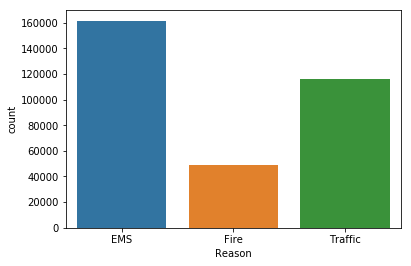

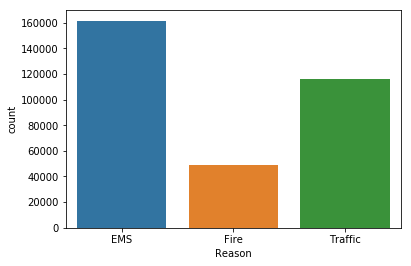

In [36]:
sns.countplot(x='Reason',data=df)

___
** What is the data type of the objects in the timeStamp column? **

str

In [71]:
type(df['timeStamp'])
x=df['timeStamp'][1]
type(x)

str

** Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [72]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** We can grab specific attributes from a Datetime object like -**

    time = df['timeStamp'].iloc[0]
    time.hour

**Use .apply() Method, to create 3 new columns called Hour, Month, and Day of Week. 
You will create these columns based off the timeStamp column.**

In [73]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,3


** Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [74]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,Thu


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

TypeError: 'module' object is not callable

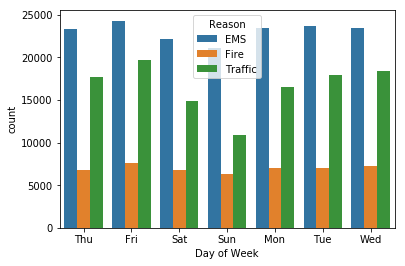

In [55]:
sns.countplot(x='Day of Week' ,data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Now do the same for Month:**

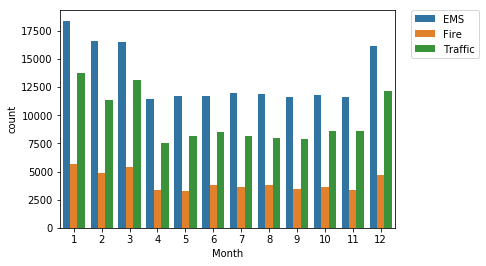

TypeError: 'module' object is not callable

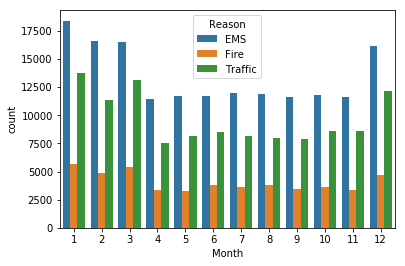

In [80]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [81]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,12,Thu,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,12,Thu,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,12,Thu,EMS,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
2015-12-15,419,419,419,380,419,419,418,419,419,419,419,419,419
2015-12-16,376,376,376,343,376,376,376,376,376,376,376,376,376
2015-12-17,387,387,387,336,387,387,387,387,387,387,387,387,387
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


In [83]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
2015-12-15,419,419,419,380,419,419,418,419,419,419,419,419,419
2015-12-16,376,376,376,343,376,376,376,376,376,376,376,376,376
2015-12-17,387,387,387,336,387,387,387,387,387,387,387,387,387
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


In [ ]:
sns.

TypeError: 'module' object is not callable

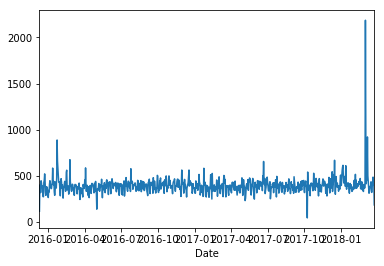

In [84]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

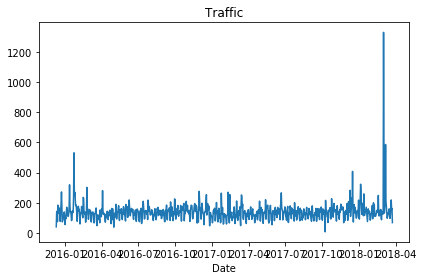

In [28]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

AttributeError: module 'matplotlib' has no attribute 'title'

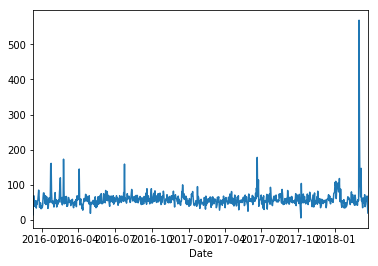

In [85]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

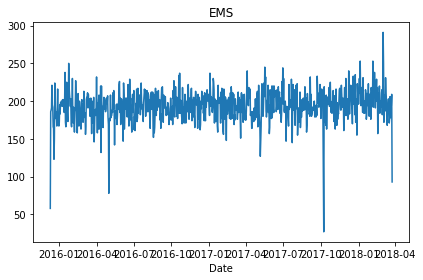

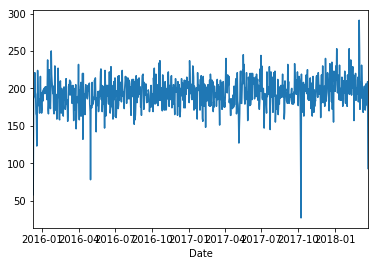

In [88]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()


____
** Let's try to create  heatmaps with seaborn and our data. But, first we will need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 
There are lots of ways to do this, but let's try to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. **

In [89]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack() ##Here, we can also use pivot method

In [100]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Mon,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
Sat,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Sun,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thu,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120


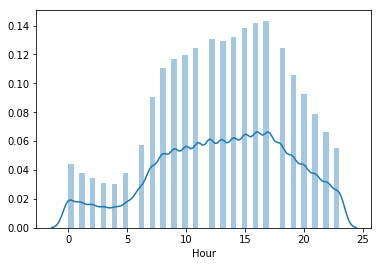

In [105]:
sns.distplot(df['Hour'])

** Now create a HeatMap using this new DataFrame. **

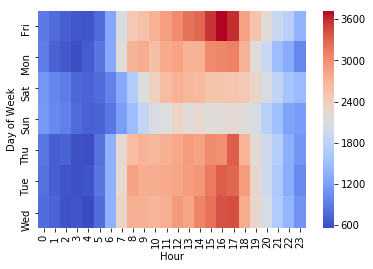

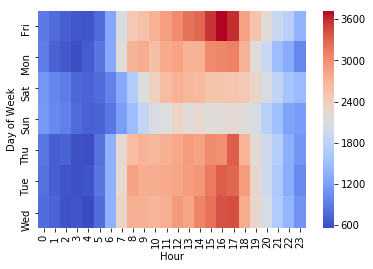

In [93]:
sns.heatmap(data=dayHour,cmap='coolwarm')

** Now create a clustermap using this DataFrame. **

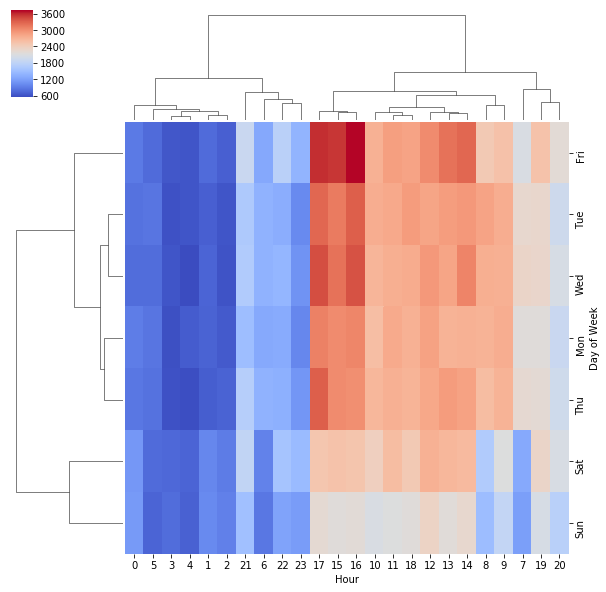

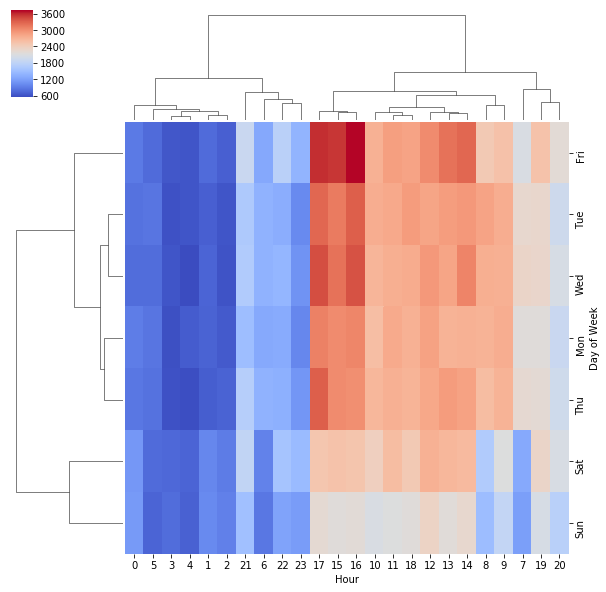

In [95]:
sns.clustermap(dayHour,cmap='coolwarm')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [96]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sun,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thu,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899


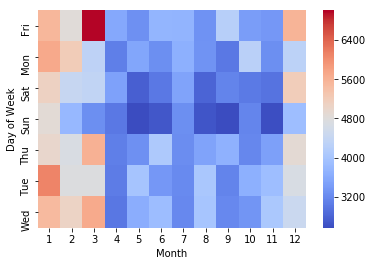

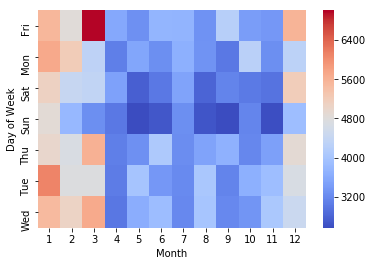

In [98]:
sns.heatmap(dayMonth,cmap='coolwarm')

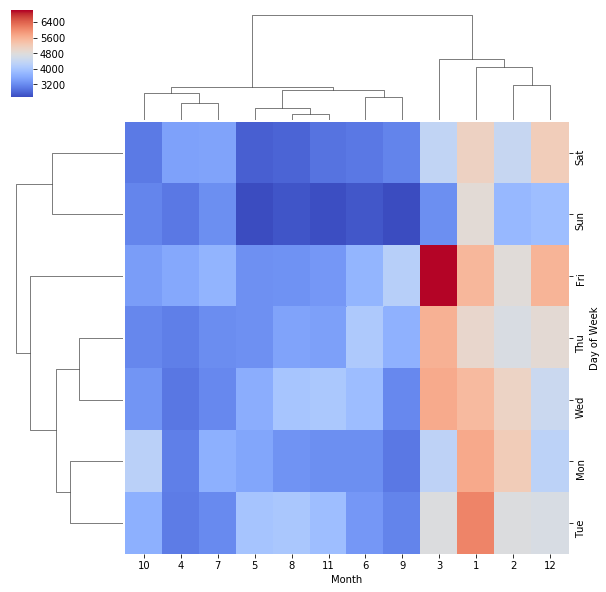

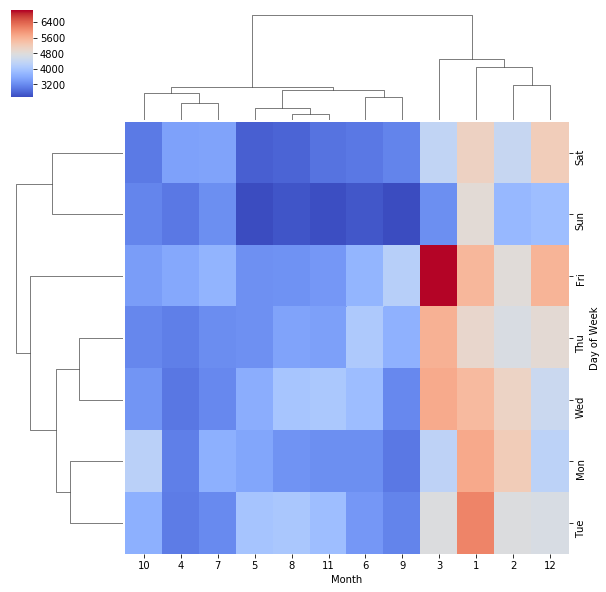

In [99]:
sns.clustermap(dayMonth,cmap='coolwarm')